<a href="https://colab.research.google.com/github/brenoslivio/SME0828_DataScience/blob/master/Projects/3%20-%20Classifica%C3%A7%C3%A3o/Projeto3_Classificacao_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0828 - Introdução à Ciência de Dados
# Projeto 3: Classificação 

### Alunos

Aline Fernanda da Conceição, Nº USP: 9437275

Breno Lívio Silva de Almeida, Nº USP: 10276675

Matheus Victal Cerqueira, Nº USP: 10276661

***Universidade de São Paulo, São Carlos, Brasil.***

## Exercícios sugeridos para a atividade avaliativa 3

Os seguintes exercícios foram sugeridos para entrega em 03 de novembro de 2020 para a disciplina SME0828 - Ciência de Dados oferecida pelo Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP), a qual foi ministrada pelo professor Francisco Aparecido Rodrigues. Vamos trabalhar com o conjunto de dados [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset). O dataset tem várias informações sobre características de estrelas como temperatura absoluta, luminosidade relativa, tipos de estrelas, entre outros. Vamos classificar os dados considerando vários classificadores conhecidos.



---



## Sumário

1. Desenvolvimento

  1.1 [Exercício 1](#ex1)

  1.2 [Exercício 2](#ex2)

  1.3 [Exercício 3](#ex3)

  1.4 [Exercício 4](#ex4)

  1.5 [Exercício 5](#ex5)

  1.6 [Exercício 6](#ex6)



---



## Desenvolvimento

### <a name="ex5"></a> 5 - Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

```
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
n = 500
c = [(1,1), (10,10)] #center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class
X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show(True)
```
### Compare os classificadores Naive Bayes e Bayesiano Paramétrico variando a separação entre as nuvens de pontos – mantenha a posição de uma classe fixa e mude a posição do centro da outra classe, calculando a distância entre os centros.


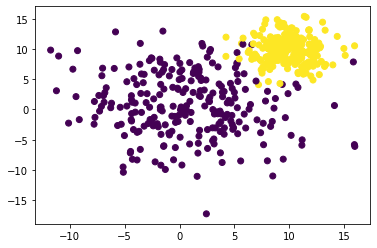

In [63]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
n = 500
c = [(1,1), (10,10)] #center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class
X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show(True)

Naive Bayes

Bayesiano Paramétrico

In [64]:
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)
#normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [65]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-1.18349774e-16 -8.50652881e-16]
Desvio Padrao: [1. 1.]


In [66]:
#definir o o conjutno de teste e treinamento
from sklearn.model_selection import train_test_split
p = 0.8 # fracao de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

P = pd.n(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
#Pc = np.zeros(len(classes)) #fração de elementos em cada classe
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = x_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

### <a name="ex6"></a> 6 - Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

```
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap=’viridis’, s=50, alpha=0.7)
plt.show(True)
```
### Compare os classificadores Naive Bayes, k-vizinhos mais próximos e regressão logística variando o nível de ruído (noise) no intervalo [0,1]. No caso do algoritmo k-vizinho, mostre os resultados para diferentes valores de k.


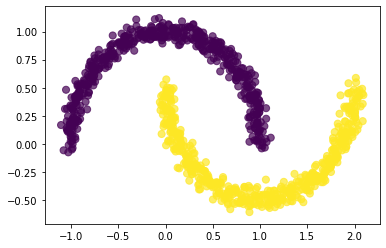

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=0.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Primeiramente geramos os dados e realizamos o procedimento utilizando o classificador de Naive Bayes e idenficar sua acurácia 

In [20]:
#gerar os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score1 = [] 
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #padronizar os dados
    X = scaler.transform(X)
    p = 0.7 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25) #Seleciona os conjuntos de treinamento e teste
    model = GaussianNB() #Ajusta o classificador Naive-Bayes de acordo com os dados
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # Predicao
    score1.append(accuracy_score(y_pred, y_test)) #Calcula a acuracia

In [21]:
print("Acurácia Máxima:",np.max(score1),"\nAcurácia Mínima:",np.min(score1))

Acurácia Máxima: 0.8733333333333333 
Acurácia Mínima: 0.7033333333333334


Os valores da acurácia foram satisfatórios 

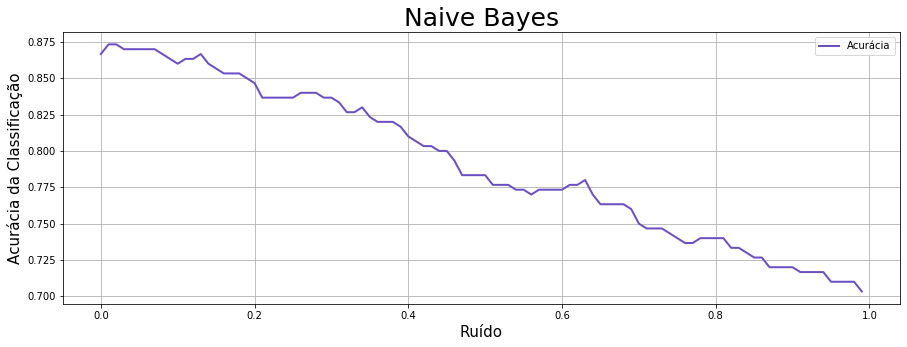

In [22]:
plt.figure(figsize=(15,5))
plt.plot(noise, score1, linestyle='-', color="#6C4FC5", linewidth=2)
plt.ylabel("Acurácia da Classificação", fontsize=15)
plt.xlabel("Ruído", fontsize=15)
plt.legend(['Acurácia'],loc = 0)
plt.grid()
plt.title("Naive Bayes", fontsize = 25)
plt.show(True)

Agora faremos o procedimento para ajustar o modelo k-vizinhos

In [54]:
#gerando os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score2 = []

In [55]:
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #normalizando os dados
    X = scaler.transform(X)
    p = 0.7
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25)
    model = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')# ajusta o modelo k-vizinhos
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)  # faz a predição no conjunto de teste
    score2.append(accuracy_score(y_pred, y_test)) # verifica a acurácia da predicao

In [56]:
print("Acurácia Máxima:",np.max(score2),"\nAcurácia Mínima:",np.min(score2))

Acurácia Máxima: 1.0 
Acurácia Mínima: 0.59


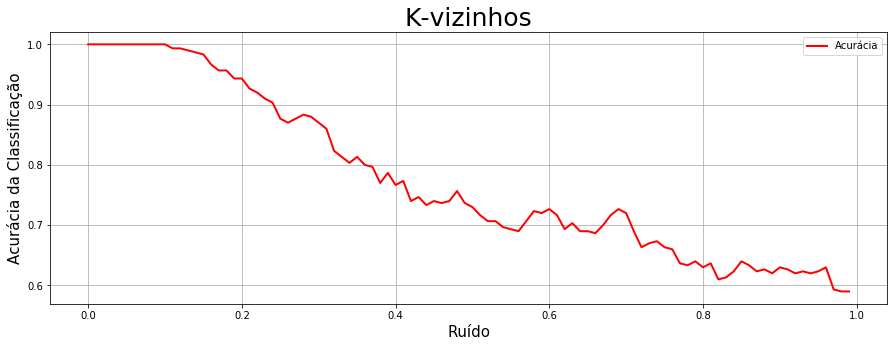

In [57]:
#plotar o gráfico
plt.figure(figsize=(15,5))
plt.plot(noise, score2, linestyle='-', color="#CD139C", linewidth=2)
plt.ylabel("Acurácia da Classificação", fontsize=15)
plt.xlabel("Ruído", fontsize=15)
plt.legend(['Acurácia'],loc = 0)
plt.grid()
plt.title("K-vizinhos", fontsize = 25)
plt.show(True)

Do mesmo modo vamos verificar o modelo para a Regressão Logística

In [58]:
n_samples = 1000
score3 = []
noise = np.arange(0,1,0.01)

In [59]:
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    classes = np.array(pd.unique(y), dtype=int) 
    p = 0.7
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 50)

    model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score3.append(model.score(x_test, y_test))

In [60]:
print("Acurácia Máxima:",np.max(score3),"\nAcurácia Mínima:",np.min(score3))

Acurácia Máxima: 0.8866666666666667 
Acurácia Mínima: 0.7


Text(0.5, 1.0, 'Regressão Logística')

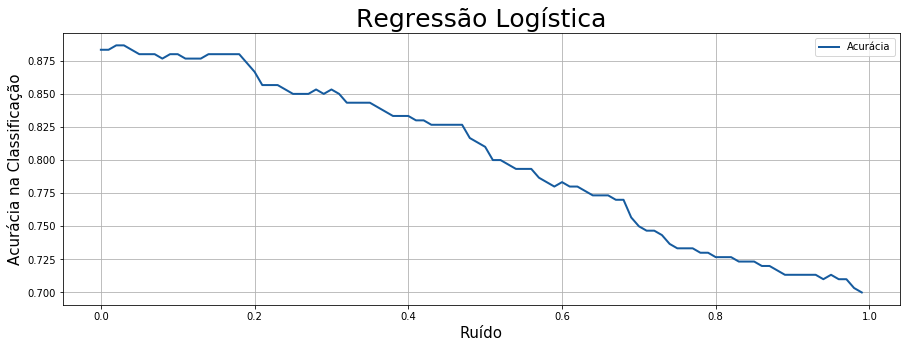

In [62]:
plt.figure(figsize=(15,5))
plt.plot(noise, score3, linestyle='-', color="#165B9E", linewidth=2)
plt.ylabel("Acurácia na Classificação", fontsize=15)
plt.xlabel("Ruído", fontsize=15)
plt.legend(['Acurácia'],loc = 0)
plt.grid()
plt.title("Regressão Logística", fontsize = 25)